In [1]:
#Implementation of the Hidden Markov Model in Python

In [2]:
#Exploring Treebank Tagged Corpus

In [3]:
#Importing libraries
import nltk, re, pprint
import numpy as np
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import pprint, time
import random
from sklearn.model_selection import train_test_split
from nltk.tokenize import word_tokenize
# reading the Treebank tagged sentences
wsj = list(nltk.corpus.treebank.tagged_sents())
# first few tagged sentences
print(wsj[:40])

[[('Pierre', 'NNP'), ('Vinken', 'NNP'), (',', ','), ('61', 'CD'), ('years', 'NNS'), ('old', 'JJ'), (',', ','), ('will', 'MD'), ('join', 'VB'), ('the', 'DT'), ('board', 'NN'), ('as', 'IN'), ('a', 'DT'), ('nonexecutive', 'JJ'), ('director', 'NN'), ('Nov.', 'NNP'), ('29', 'CD'), ('.', '.')], [('Mr.', 'NNP'), ('Vinken', 'NNP'), ('is', 'VBZ'), ('chairman', 'NN'), ('of', 'IN'), ('Elsevier', 'NNP'), ('N.V.', 'NNP'), (',', ','), ('the', 'DT'), ('Dutch', 'NNP'), ('publishing', 'VBG'), ('group', 'NN'), ('.', '.')], [('Rudolph', 'NNP'), ('Agnew', 'NNP'), (',', ','), ('55', 'CD'), ('years', 'NNS'), ('old', 'JJ'), ('and', 'CC'), ('former', 'JJ'), ('chairman', 'NN'), ('of', 'IN'), ('Consolidated', 'NNP'), ('Gold', 'NNP'), ('Fields', 'NNP'), ('PLC', 'NNP'), (',', ','), ('was', 'VBD'), ('named', 'VBN'), ('*-1', '-NONE-'), ('a', 'DT'), ('nonexecutive', 'JJ'), ('director', 'NN'), ('of', 'IN'), ('this', 'DT'), ('British', 'JJ'), ('industrial', 'JJ'), ('conglomerate', 'NN'), ('.', '.')], [('A', 'DT'), ('f

In [4]:
#Train Test Split

In [5]:
#In this step, we will split the dataset into a 70:30 ratio 

In [6]:
# Splitting into train and test
random.seed(1234)
train_set, test_set = train_test_split(wsj,test_size=0.3)
print(len(train_set))
print(len(test_set))
print(train_set[:40])

2739
1175
[[('In', 'IN'), ('an', 'DT'), ('era', 'NN'), ('when', 'WRB'), ('every', 'DT'), ('government', 'NN'), ('agency', 'NN'), ('has', 'VBZ'), ('a', 'DT'), ('public-relations', 'NNS'), ('machine', 'NN'), ('that', 'WDT'), ('*T*-2', '-NONE-'), ('sends', 'VBZ'), ('you', 'PRP'), ('stuff', 'NN'), ('whether', 'IN'), ('you', 'PRP'), ('want', 'VBP'), ('it', 'PRP'), ('or', 'CC'), ('not', 'RB'), ('*T*-1', '-NONE-'), (',', ','), ('this', 'DT'), ('does', 'VBZ'), ('seem', 'VB'), ('odd', 'JJ'), ('.', '.')], [('--', ':'), ('Of', 'IN'), ('all', 'DT'), ('scenes', 'NNS'), ('that', 'WDT'), ('*T*-219', '-NONE-'), ('evoke', 'VBP'), ('rural', 'JJ'), ('England', 'NNP'), (',', ','), ('this', 'DT'), ('is', 'VBZ'), ('one', 'CD'), ('of', 'IN'), ('the', 'DT'), ('loveliest', 'JJS'), ('*T*-2', '-NONE-'), (':', ':'), ('An', 'DT'), ('ancient', 'JJ'), ('stone', 'NN'), ('church', 'NN'), ('stands', 'VBZ'), ('amid', 'IN'), ('the', 'DT'), ('fields', 'NNS'), (',', ','), ('the', 'DT'), ('sound', 'NN'), ('of', 'IN'), ('bel

In [7]:
#From the above output, we can observe that the total number of training records is 2739, and the test set has 1175.

In [9]:
#will check the number of tagged words in the training set to understand how much data will be used for training the POS tagger

In [10]:
# Getting list of tagged words
train_tagged_words = [tup for sent in train_set for tup in sent]
len(train_tagged_words)

69935

In [11]:
#will create a tokens variable that will contain all the tokens from the train_tagged_words

In [12]:
# tokens 
tokens = [pair[0] for pair in train_tagged_words]
# vocabulary
V = set(tokens)
print("Total vocabularies: ",len(V))
# number of tags
T = set([pair[1] for pair in train_tagged_words])
print("Total tags: ",len(T))

Total vocabularies:  10262
Total tags:  45


In [13]:
#will use HMM algorithm to tag the words.

In [14]:
#P(w/t) is basically the probability that given a tag (say NN), what is the probability of it being w (say ‘building’). 
#This can be computed by computing the fraction of all NNs which are equal to w, i.e.P(w/t) = count(w, t) / count(t).

In [15]:
#The term P(t) is the probability of tag t, and in a tagging task, we assume that a tag will depend only on the previous tag

In [16]:
#Emission probabilities

In [17]:
# computing P(w/t) and storing in T x V matrix
t = len(T)
v = len(V)
w_given_t = np.zeros((t, v))
# compute word given tag: Emission Probability
def word_given_tag(word, tag, train_bag = train_tagged_words):
    tag_list = [pair for pair in train_bag if pair[1]==tag]
    count_tag = len(tag_list)
    w_given_tag_list = [pair[0] for pair in tag_list if pair[0]==word]
    count_w_given_tag = len(w_given_tag_list)
    
    return (count_w_given_tag, count_tag)
# examples
# large
print("\n", "large")
print(word_given_tag('large', 'JJ'))
print(word_given_tag('large', 'VB'))
print(word_given_tag('large', 'NN'), "\n")
# will
print("\n", "will")
print(word_given_tag('will', 'MD'))
print(word_given_tag('will', 'NN'))
print(word_given_tag('will', 'VB'))
# book
print("\n", "book")
print(word_given_tag('book', 'NN'))
print(word_given_tag('book', 'VB'))


 large
(19, 4042)
(0, 1765)
(0, 9045) 


 will
(192, 633)
(1, 9045)
(0, 1765)

 book
(4, 9045)
(1, 1765)


In [18]:
#Transition Probabilities

In [19]:
# compute tag given tag: tag2(t2) given tag1 (t1), i.e. Transition Probability
def t2_given_t1(t2, t1, train_bag = train_tagged_words):
    tags = [pair[1] for pair in train_bag]
    count_t1 = len([t for t in tags if t==t1])
    count_t2_t1 = 0
    for index in range(len(tags)-1):
        if tags[index]==t1 and tags[index+1] == t2:
            count_t2_t1 += 1
    return (count_t2_t1, count_t1)
# examples
print(t2_given_t1(t2='NNP', t1='JJ'))
print(t2_given_t1('NN', 'JJ'))
print(t2_given_t1('NN', 'DT'))
print(t2_given_t1('NNP', 'VB'))
print(t2_given_t1(',', 'NNP'))
print(t2_given_t1('PRP', 'PRP'))
print(t2_given_t1('VBG', 'NNP'))

(152, 4042)
(1793, 4042)
(2662, 5658)
(62, 1765)
(1057, 6734)
(2, 1157)
(3, 6734)


In [20]:
#Please note P(tag|start) is same as P(tag|'.')
print(t2_given_t1('DT', '.'))
print(t2_given_t1('VBG', '.'))
print(t2_given_t1('NN', '.'))
print(t2_given_t1('NNP', '.'))

(582, 2707)
(11, 2707)
(98, 2707)
(522, 2707)


In [21]:
#Next, we will create a transition matrix of tags of dimension txt

In [22]:
# creating t x t transition matrix of tags
# each column is t2, each row is t1
# thus M(i, j) represents P(tj given ti)
tags_matrix = np.zeros((len(T), len(T)), dtype='float32')
for i, t1 in enumerate(list(T)):
    for j, t2 in enumerate(list(T)): 
        tags_matrix[i, j] = t2_given_t1(t2, t1)[0]/t2_given_t1(t2, t1)[1]
tags_matrix

array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 3.9215688e-02],
       [0.0000000e+00, 0.0000000e+00, 6.3291140e-02, ..., 0.0000000e+00,
        0.0000000e+00, 3.7974682e-02],
       [1.7686425e-02, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        2.3900573e-03, 2.8680688e-02],
       ...,
       [0.0000000e+00, 0.0000000e+00, 1.1940298e-01, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [2.2662889e-02, 0.0000000e+00, 5.6657224e-04, ..., 0.0000000e+00,
        1.6997167e-03, 6.4589232e-02],
       [4.4223329e-04, 1.3266999e-03, 4.6323936e-02, ..., 1.1055832e-04,
        9.9502492e-04, 1.2404644e-01]], dtype=float32)

In [23]:
#As tags are not visible in this matrix, we will now convert it into pandas dataframe for better readability.

In [24]:
# convert the matrix to a df for better readability
tags_df = pd.DataFrame(tags_matrix, columns = list(T), index=list(T))
tags_df

,RP,-RRB-,VBD,-LRB-,MD,-NONE-,DT,CC,.,LS,...,RBR,PRP,FW,WDT,PDT,PRP$,NNPS,EX,VB,NN
RP,0.000000,0.000000,0.000000,0.000000,0.000000,0.104575,0.189542,0.006536,0.026144,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.071895,0.000000,0.000000,0.000000,0.039216
-RRB-,0.000000,0.000000,0.063291,0.000000,0.000000,0.050633,0.063291,0.050633,0.126582,0.000000,...,0.000000,0.012658,0.000000,0.012658,0.000000,0.000000,0.000000,0.000000,0.000000,0.037975
VBD,0.017686,0.000000,0.000000,0.000000,0.000000,0.269598,0.129063,0.002390,0.007648,0.000000,...,0.003824,0.011950,0.000000,0.000000,0.000956,0.016730,0.000000,0.000000,0.002390,0.028681
-LRB-,0.000000,0.000000,0.000000,0.000000,0.000000,0.013158,0.092105,0.026316,0.000000,0.000000,...,0.000000,0.026316,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.039474
MD,0.000000,0.000000,0.000000,0.000000,0.000000,0.004739,0.001580,0.000000,0.000000,0.000000,...,0.000000,0.001580,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.819905,0.000000
-NONE-,0.001089,0.004356,0.030930,0.001307,0.014376,0.070355,0.051623,0.011544,0.092355,0.000000,...,0.001307,0.048791,0.000000,0.000000,0.000000,0.003267,0.000000,0.001307,0.009148,0.021128
DT,0.000000,0.000177,0.001944,0.000353,0.001767,0.001944,0.001414,0.000177,0.001060,0.000000,...,0.001414,0.000353,0.000177,0.000353,0.000000,0.000000,0.003358,0.000000,0.000000,0.470484
CC,0.000000,0.000000,0.039128,0.000000,0.011546,0.008980,0.117383,0.000641,0.000000,0.000641,...,0.001283,0.042335,0.000000,0.001283,0.000000,0.016036,0.002566,0.005773,0.033355,0.114817
.,0.000000,0.003694,0.000000,0.003694,0.000000,0.020687,0.214998,0.050610,0.000000,0.001478,...,0.001108,0.058737,0.000000,0.000739,0.000739,0.007758,0.001847,0.005541,0.000739,0.036202
LS,0.000000,0.428571,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.285714,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [25]:
#Next will create a heatmap of the tag matrix

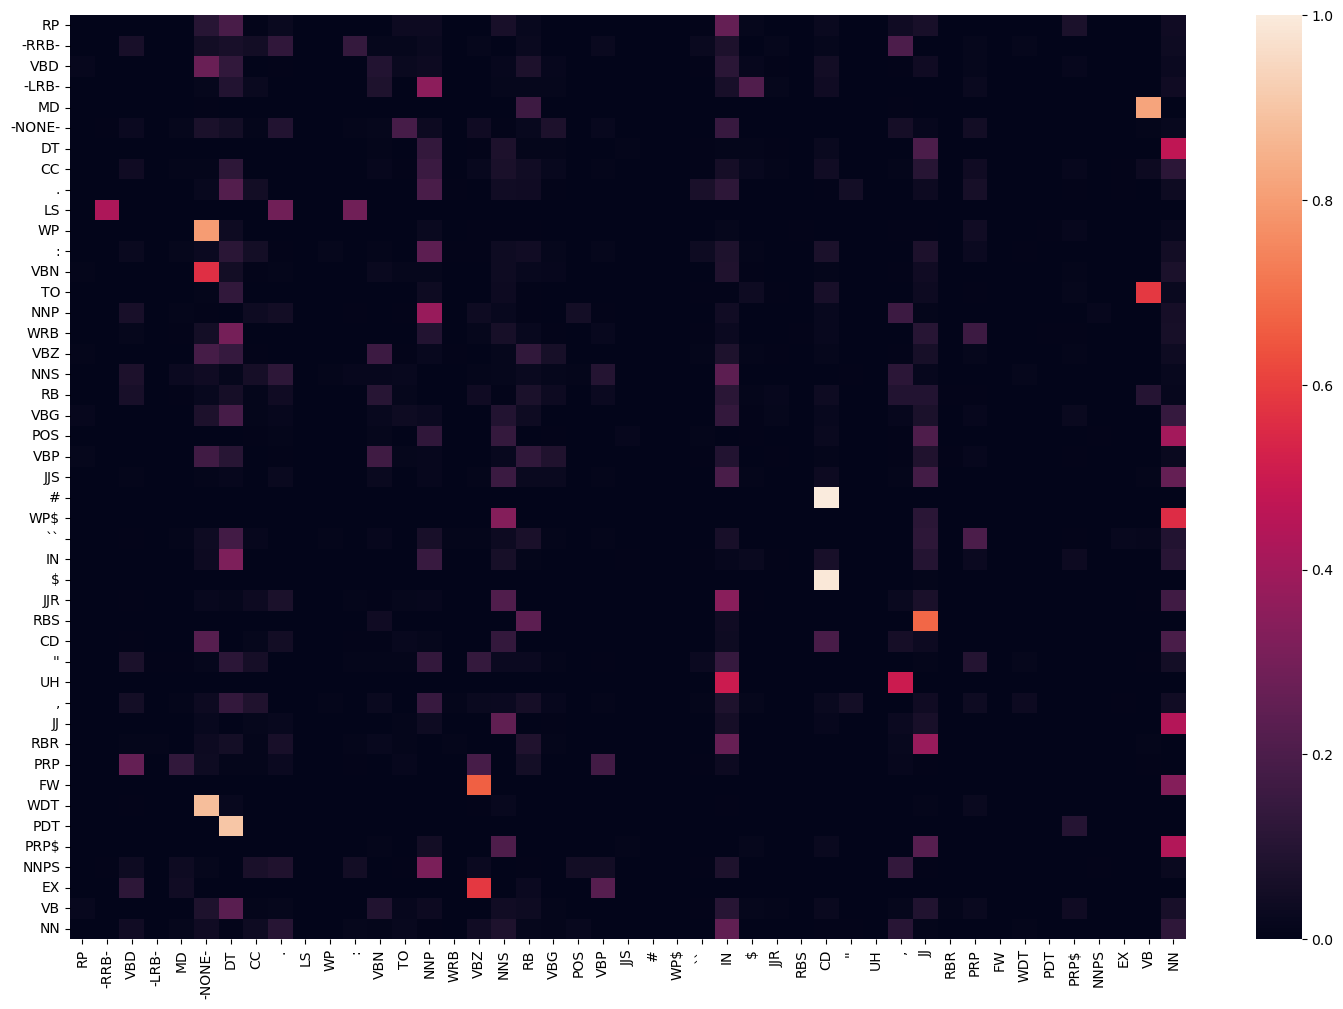

In [26]:
# heatmap of tags matrix
# T(i, j) means P(tag j given tag i)
plt.figure(figsize=(18, 12))
sns.heatmap(tags_df)
plt.show()

In [27]:
#Now, in order to see the most frequent tags we have to filter the tags with >0.5 probability

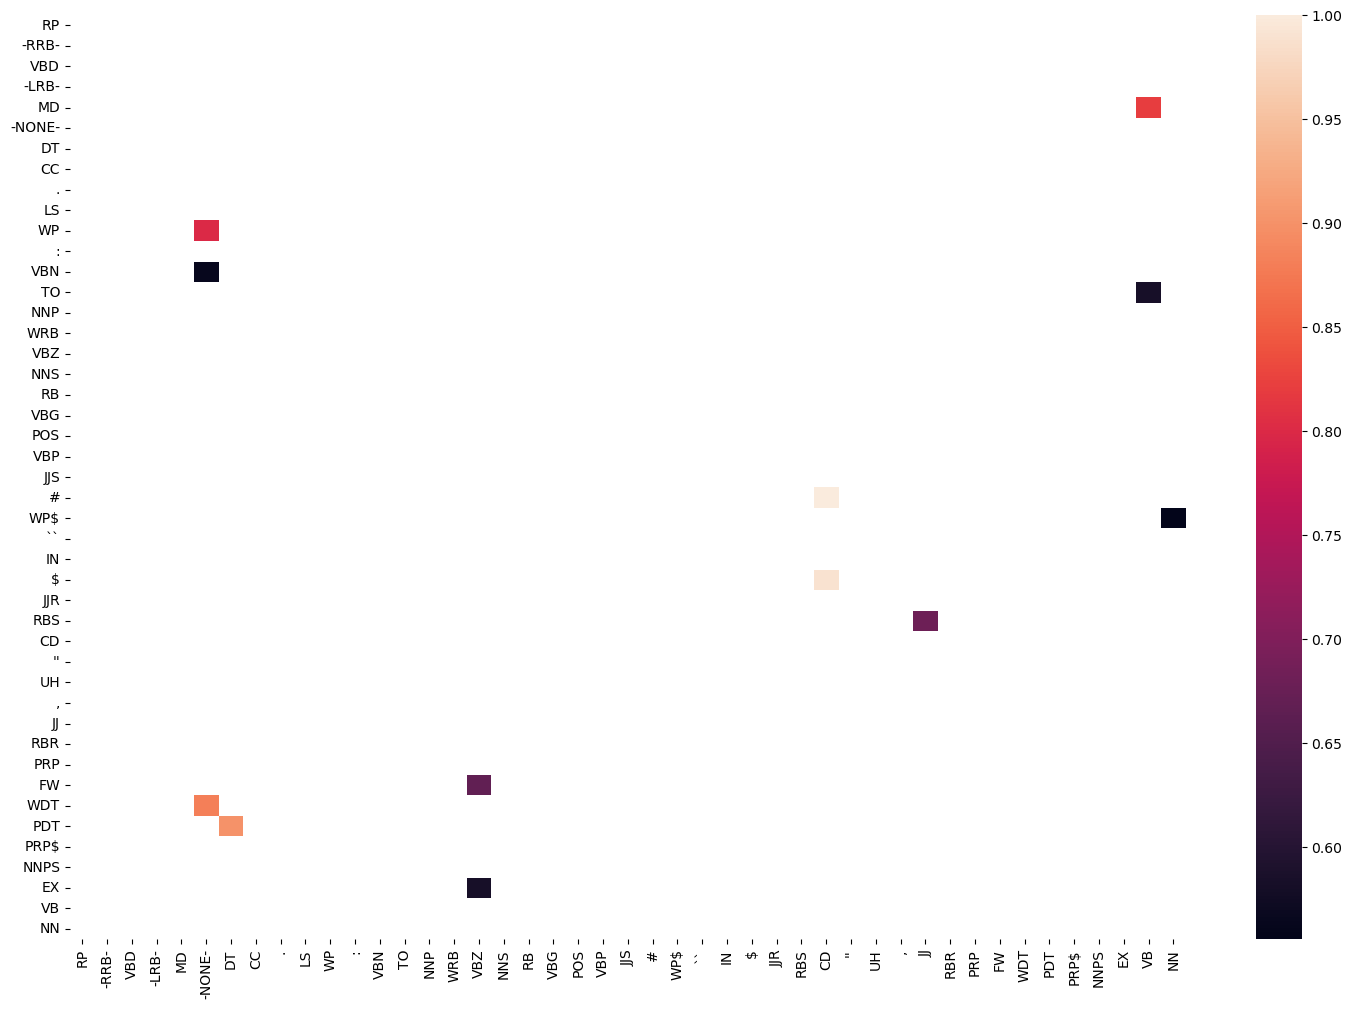

In [28]:
# frequent tags
# filter the df to get P(t2, t1) > 0.5
tags_frequent = tags_df[tags_df>0.5]
plt.figure(figsize=(18, 12))
sns.heatmap(tags_frequent)
plt.show()

In [29]:
#Viterbi Algorithm

In [30]:
#Let’s now use the computed probabilities P(w, tag) and P(t2, t1) to assign tags to each word in the document. We’ll run through each word w and compute P(tag/w)=P(w/tag).P(tag) for each tag in the tag set, and then assign the tag having
#the max P(tag/w)

In [31]:
#Note: P(tag|start) = P(tag|’.’)

In [32]:
# Viterbi Heuristic
def Viterbi(words, train_bag = train_tagged_words):
    state = []
    T = list(set([pair[1] for pair in train_bag]))
    
    for key, word in enumerate(words):
        #initialise list of probability column for a given observation
        p = [] 
        for tag in T:
            if key == 0:
                transition_p = tags_df.loc['.', tag]
            else:
                transition_p = tags_df.loc[state[-1], tag]
                
            # compute emission and state probabilities
            emission_p = word_given_tag(words[key], tag)[0]/word_given_tag(words[key], tag)[1]
            state_probability = emission_p * transition_p    
            p.append(state_probability)
            
        pmax = max(p)
        # getting state for which probability is maximum
        state_max = T[p.index(pmax)] 
        state.append(state_max)
    return list(zip(words, state))

In [33]:
#Evaluating on Test Set

In [34]:
# Running on entire test dataset would take more than 3-4hrs. 
# Let's test our Viterbi algorithm on a few sample sentences of test dataset
random.seed(1234)
# choose random 5 sents
rndom = [random.randint(1,len(test_set)) for x in range(5)]
# list of sents
test_run = [test_set[i] for i in rndom]
# list of tagged words
test_run_base = [tup for sent in test_run for tup in sent]
# list of untagged words
test_tagged_words = [tup[0] for sent in test_run for tup in sent]
test_run

[[('The', 'DT'),
  ('purchase', 'NN'),
  ('price', 'NN'),
  ('includes', 'VBZ'),
  ('two', 'CD'),
  ('ancillary', 'JJ'),
  ('companies', 'NNS'),
  ('.', '.')],
 [('He', 'PRP'),
  ('has', 'VBZ'),
  ('a', 'DT'),
  ('point', 'NN'),
  ('0', '-NONE-'),
  ('he', 'PRP'),
  ('wants', 'VBZ'),
  ('*-1', '-NONE-'),
  ('to', 'TO'),
  ('make', 'VB'),
  ('*T*-2', '-NONE-'),
  (',', ','),
  ('and', 'CC'),
  ('he', 'PRP'),
  ('makes', 'VBZ'),
  ('it', 'PRP'),
  (',', ','),
  ('with', 'IN'),
  ('a', 'DT'),
  ('great', 'JJ'),
  ('deal', 'NN'),
  ('of', 'IN'),
  ('force', 'NN'),
  ('.', '.')],
 [('The', 'DT'),
  ('new', 'JJ'),
  ('plant', 'NN'),
  (',', ','),
  ('located', 'VBN'),
  ('*', '-NONE-'),
  ('in', 'IN'),
  ('Chinchon', 'NNP'),
  ('about', 'IN'),
  ('60', 'CD'),
  ('miles', 'NNS'),
  ('from', 'IN'),
  ('Seoul', 'NNP'),
  (',', ','),
  ('will', 'MD'),
  ('help', 'VB'),
  ('*-2', '-NONE-'),
  ('meet', 'VB'),
  ('increasing', 'VBG'),
  ('and', 'CC'),
  ('diversifying', 'VBG'),
  ('demand', 'NN'),


In [35]:
#now, we will tag the test sentences using the Viterbi algorithm

In [36]:
# tagging the test sentences
start = time.time()
tagged_seq = Viterbi(test_tagged_words)
end = time.time()
difference = end-start
print("Time taken in seconds: ", difference)
print(tagged_seq)

Time taken in seconds:  11.921807527542114
[('The', 'DT'), ('purchase', 'NN'), ('price', 'NN'), ('includes', 'VBZ'), ('two', 'CD'), ('ancillary', 'RP'), ('companies', 'NNS'), ('.', '.'), ('He', 'PRP'), ('has', 'VBZ'), ('a', 'DT'), ('point', 'NN'), ('0', '-NONE-'), ('he', 'PRP'), ('wants', 'VBZ'), ('*-1', '-NONE-'), ('to', 'TO'), ('make', 'VB'), ('*T*-2', '-NONE-'), (',', ','), ('and', 'CC'), ('he', 'PRP'), ('makes', 'VBZ'), ('it', 'PRP'), (',', ','), ('with', 'IN'), ('a', 'DT'), ('great', 'JJ'), ('deal', 'NN'), ('of', 'IN'), ('force', 'NN'), ('.', '.'), ('The', 'DT'), ('new', 'JJ'), ('plant', 'NN'), (',', ','), ('located', 'VBN'), ('*', '-NONE-'), ('in', 'IN'), ('Chinchon', 'RP'), ('about', 'IN'), ('60', 'CD'), ('miles', 'NNS'), ('from', 'IN'), ('Seoul', 'NNP'), (',', ','), ('will', 'MD'), ('help', 'VB'), ('*-2', '-NONE-'), ('meet', 'VBP'), ('increasing', 'VBG'), ('and', 'CC'), ('diversifying', 'RP'), ('demand', 'NN'), ('for', 'IN'), ('control', 'NN'), ('products', 'NNS'), ('in', 'IN')

In [37]:
#As we can see it has taken around 12 seconds and it has tagged all the words in the test sentences. Now in order to check the accuracy we have to execute
#the below code

In [38]:
# accuracy
check = [i for i, j in zip(tagged_seq, test_run_base) if i == j] 
accuracy = len(check)/len(tagged_seq)
print(accuracy)

0.9130434782608695


In [39]:
#Our POS tagger model, which is based on HMM, achieves a reasonably good accuracy of 91.30% for POS tagging

In [40]:
#Now let’s test the model on a sample sentence.

In [41]:
## Testing
sentence_test = 'Twitter is the best networking social site. Man is a social animal. Data science is an emerging field. Data science jobs are high in demand.'
words = word_tokenize(sentence_test)
start = time.time()
tagged_seq = Viterbi(words)
print(tagged_seq)

[('Twitter', 'RP'), ('is', 'RP'), ('the', 'DT'), ('best', 'JJS'), ('networking', 'RP'), ('social', 'JJ'), ('site', 'RP'), ('.', '.'), ('Man', 'NNP'), ('is', 'VBZ'), ('a', 'DT'), ('social', 'JJ'), ('animal', 'RP'), ('.', '.'), ('Data', 'NNP'), ('science', 'RP'), ('is', 'RP'), ('an', 'DT'), ('emerging', 'VBG'), ('field', 'NN'), ('.', '.'), ('Data', 'NNP'), ('science', 'RP'), ('jobs', 'NNS'), ('are', 'VBP'), ('high', 'JJ'), ('in', 'IN'), ('demand', 'NN'), ('.', '.')]


In [ ]:
#As we can see HMM model has done a reasonably good job of tagging a sample sentence.